In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

# OPS 예측 데이터

In [3]:
mlb_df = pd.read_csv('./data/mlb_season_data.csv')
mlb_df

C:\Users\playdata2\AppData\Local\Temp\ipykernel_21924\3699836054.py:1: DtypeWarning: Columns (13,16,17,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  mlb_df = pd.read_csv('./data/mlb_season_data.csv')


,season,first_name,last_name,link,position,team,games_played,at_bats,runs,hits,...,homeruns,rbi,walks,strikeouts,stolen_bases,caught_stealing,batting_average,on_base_percentage,slugging_percentage,on_base_plus_slugging
0,1876,Bob,Addy,/player/110074,X,CHI,32,142,36,40,...,0,16,5,0.0,--,--,0.282,--,0.324,--
1,1876,Art,Allison,/player/110170,X,LOU,31,130,9,27,...,0,10,2,6.0,--,--,0.208,--,0.238,--
2,1876,Doug,Allison,/player/110172,C,HAR,44,163,19,43,...,0,15,3,9.0,--,--,0.264,--,0.288,--
3,1876,Fred,Andrus,/player/110275,X,CHI,8,36,6,11,...,0,2,0,5.0,--,--,0.306,--,0.389,--
4,1876,Cap,Anson,/player/110284,3B,CHI,66,309,63,110,...,2,59,12,8.0,--,--,0.356,--,0.450,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104062,2024,Josh,Winckowski,/player/670174,P,BOS,40,0,0,0,...,0,0,0,0.0,0,0,0.000,0.0,0.000,0.0
104063,2024,Eric,Yang,/player/687066,X,CIN,1,1,0,0,...,0,0,0,1.0,0,0,0.000,0.0,0.000,0.0
104064,2024,Kirby,Yates,/player/489446,P,TEX,61,0,0,0,...,0,0,0,0.0,0,0,0.000,0.0,0.000,0.0
104065,2024,Alex,Young,/player/622065,P,CIN,3,0,0,0,...,0,0,0,0.0,0,0,0.000,0.0,0.000,0.0


In [5]:
mlb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104067 entries, 0 to 104066
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   season                 104067 non-null  int64  
 1   first_name             103751 non-null  object 
 2   last_name              104067 non-null  object 
 3   link                   104067 non-null  object 
 4   position               104067 non-null  object 
 5   team                   104067 non-null  object 
 6   games_played           104067 non-null  int64  
 7   at_bats                104067 non-null  int64  
 8   runs                   104067 non-null  int64  
 9   hits                   104067 non-null  int64  
 10  doubles                104067 non-null  int64  
 11  triples                104067 non-null  int64  
 12  homeruns               104067 non-null  int64  
 13  rbi                    104067 non-null  object 
 14  walks                  104067 non-nu

## 데이터 전처리

In [6]:
# 포지션 P(투수) 인덱스 제거
# 야수들 데이터만 있게 하고 싶어서.
drop_position = ['P', 'X']
for i in range(len(drop_position)):
    mlb_df = mlb_df[mlb_df['position'] != drop_position[i]]

mlb_df['position'].value_counts()

position
C     10989
2B     6918
LF     6697
3B     6607
SS     6575
1B     6131
RF     6109
CF     5696
DH     1236
PH      103
OF       35
PR       25
Name: count, dtype: int64

In [7]:
# 결측치 수정 필요해 보이는 컬럼
# strikeouts,rbi, stolen_bases, caught_stealing, on_base_percentage,on_base_plus_slugging

columns = ['strikeouts','rbi', 'stolen_bases', 'caught_stealing', 'on_base_percentage','on_base_plus_slugging']

for i in range(len(columns)):
    column = columns[i]
    mlb_df[column] = pd.to_numeric(mlb_df[column],  errors='coerce')
    rbi_mean = mlb_df[column].mean()
    mlb_df[column] = mlb_df[column].fillna(rbi_mean)
    print(mlb_df[column].describe())

count    57121.000000
mean        38.650141
std         33.900261
min          0.000000
25%         12.000000
50%         36.000000
75%         53.000000
max        223.000000
Name: strikeouts, dtype: float64
count    57121.000000
mean        31.572796
std         30.058801
min          0.000000
25%          6.000000
50%         23.000000
75%         50.000000
max        191.000000
Name: rbi, dtype: float64
count    57121.000000
mean         5.354748
std          9.134019
min          0.000000
25%          0.000000
50%          2.000000
75%          6.000000
max        130.000000
Name: stolen_bases, dtype: float64
count    57121.000000
mean         2.448484
std          2.963434
min          0.000000
25%          0.000000
50%          2.448484
75%          2.448484
max         42.000000
Name: caught_stealing, dtype: float64
count    57121.000000
mean         0.308545
std          0.091841
min          0.000000
25%          0.279000
50%          0.317000
75%          0.353000
max       

In [8]:
columns = ['season', 'first_name', 'last_name', 'link','team', 'on_base_percentage', 'slugging_percentage']

mlb_df = mlb_df.drop(columns, axis=1)
mlb_df

,position,games_played,at_bats,runs,hits,doubles,triples,homeruns,rbi,walks,strikeouts,stolen_bases,caught_stealing,batting_average,on_base_plus_slugging
2,C,44,163,19,43,4,0,0,15.0,3,9.0,5.354748,2.448484,0.264,0.661401
4,3B,66,309,63,110,9,7,2,59.0,12,8.0,5.354748,2.448484,0.356,0.661401
5,2B,66,322,126,138,21,14,1,59.0,20,8.0,5.354748,2.448484,0.429,0.661401
6,3B,64,283,34,85,11,4,0,46.0,6,6.0,5.354748,2.448484,0.300,0.661401
8,C,1,4,0,0,0,0,0,0.0,0,2.0,5.354748,2.448484,0.000,0.661401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103993,RF,3,5,0,0,0,0,0,0.0,0,2.0,0.000000,0.000000,0.000,0.000000
104004,RF,3,5,0,0,0,0,0,0.0,0,4.0,1.000000,0.000000,0.000,0.000000
104007,C,1,0,0,0,0,0,0,0.0,0,0.0,0.000000,0.000000,0.000,0.000000
104011,RF,1,1,1,0,0,0,0,0.0,0,0.0,0.000000,0.000000,0.000,0.000000


## Box Plot

In [11]:
mlb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57121 entries, 2 to 104045
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   position               57121 non-null  object 
 1   games_played           57121 non-null  int64  
 2   at_bats                57121 non-null  int64  
 3   runs                   57121 non-null  int64  
 4   hits                   57121 non-null  int64  
 5   doubles                57121 non-null  int64  
 6   triples                57121 non-null  int64  
 7   homeruns               57121 non-null  int64  
 8   rbi                    57121 non-null  float64
 9   walks                  57121 non-null  int64  
 10  strikeouts             57121 non-null  float64
 11  stolen_bases           57121 non-null  float64
 12  caught_stealing        57121 non-null  float64
 13  batting_average        57121 non-null  float64
 14  on_base_plus_slugging  57121 non-null  float64
dtypes: flo

In [13]:
columns =['games_played', 'at_bats', 'runs', 'hits', 'doubles',
       'triples', 'homeruns', 'rbi', 'walks', 'strikeouts', 'stolen_bases',
       'caught_stealing', 'batting_average', 'on_base_plus_slugging']

for i in columns :
    print(f'''
[{i}]
최소값 : {np.min(mlb_df[i])}
사분위수(Q1) : {np.percentile(mlb_df[i], 25)}
사분위수(Q2) : {np.percentile(mlb_df[i], 50)}
사분위수(Q3) : {np.percentile(mlb_df[i], 75)}
최대값 : {np.max(mlb_df[i])}
''')


[games_played]
최소값 : 1
사분위수(Q1) : 26.0
사분위수(Q2) : 76.0
사분위수(Q3) : 126.0
최대값 : 165


[at_bats]
최소값 : 0
사분위수(Q1) : 65.0
사분위수(Q2) : 218.0
사분위수(Q3) : 431.0
최대값 : 716


[runs]
최소값 : 0
사분위수(Q1) : 7.0
사분위수(Q2) : 26.0
사분위수(Q3) : 56.0
최대값 : 177


[hits]
최소값 : 0
사분위수(Q1) : 14.0
사분위수(Q2) : 54.0
사분위수(Q3) : 114.0
최대값 : 262


[doubles]
최소값 : 0
사분위수(Q1) : 2.0
사분위수(Q2) : 9.0
사분위수(Q3) : 19.0
최대값 : 67


[triples]
최소값 : 0
사분위수(Q1) : 0.0
사분위수(Q2) : 1.0
사분위수(Q3) : 3.0
최대값 : 36


[homeruns]
최소값 : 0
사분위수(Q1) : 0.0
사분위수(Q2) : 2.0
사분위수(Q3) : 8.0
최대값 : 73


[rbi]
최소값 : 0.0
사분위수(Q1) : 6.0
사분위수(Q2) : 23.0
사분위수(Q3) : 50.0
최대값 : 191.0


[walks]
최소값 : 0
사분위수(Q1) : 5.0
사분위수(Q2) : 17.0
사분위수(Q3) : 37.0
최대값 : 232


[strikeouts]
최소값 : 0.0
사분위수(Q1) : 12.0
사분위수(Q2) : 36.0
사분위수(Q3) : 53.0
최대값 : 223.0


[stolen_bases]
최소값 : 0.0
사분위수(Q1) : 0.0
사분위수(Q2) : 2.0
사분위수(Q3) : 6.0
최대값 : 130.0


[caught_stealing]
최소값 : 0.0
사분위수(Q1) : 0.0
사분위수(Q2) : 2.4484835132554896
사분위수(Q3) : 2.4484835132554896
최대값 : 42.0


[batting_average]
최소값 : 

IndexError: list index out of range

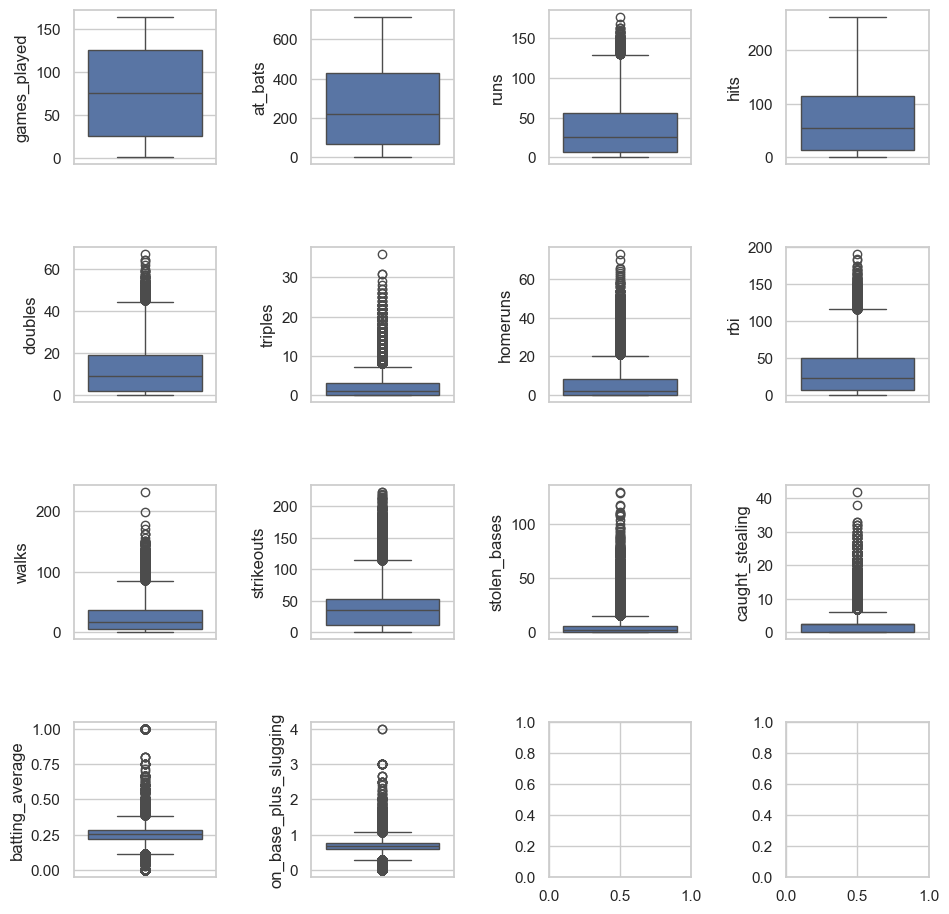

In [14]:
columns =[
    ['games_played', 'at_bats', 'runs', 'hits'], 
    ['doubles','triples', 'homeruns', 'rbi'], 
    ['walks', 'strikeouts', 'stolen_bases','caught_stealing'], 
    ['batting_average','on_base_plus_slugging']
]

sns.set(style="whitegrid")

fig, ax = plt.subplots(4, 4, figsize = (10, 10))
fig.tight_layout(pad=3.0) 

for i in range(len(columns)):
    for j in range(len(columns)):
        column = columns[i][j]
        sns.boxplot(mlb_df[column], ax=ax[i][j])
        
plt.show()

## Hist Plot

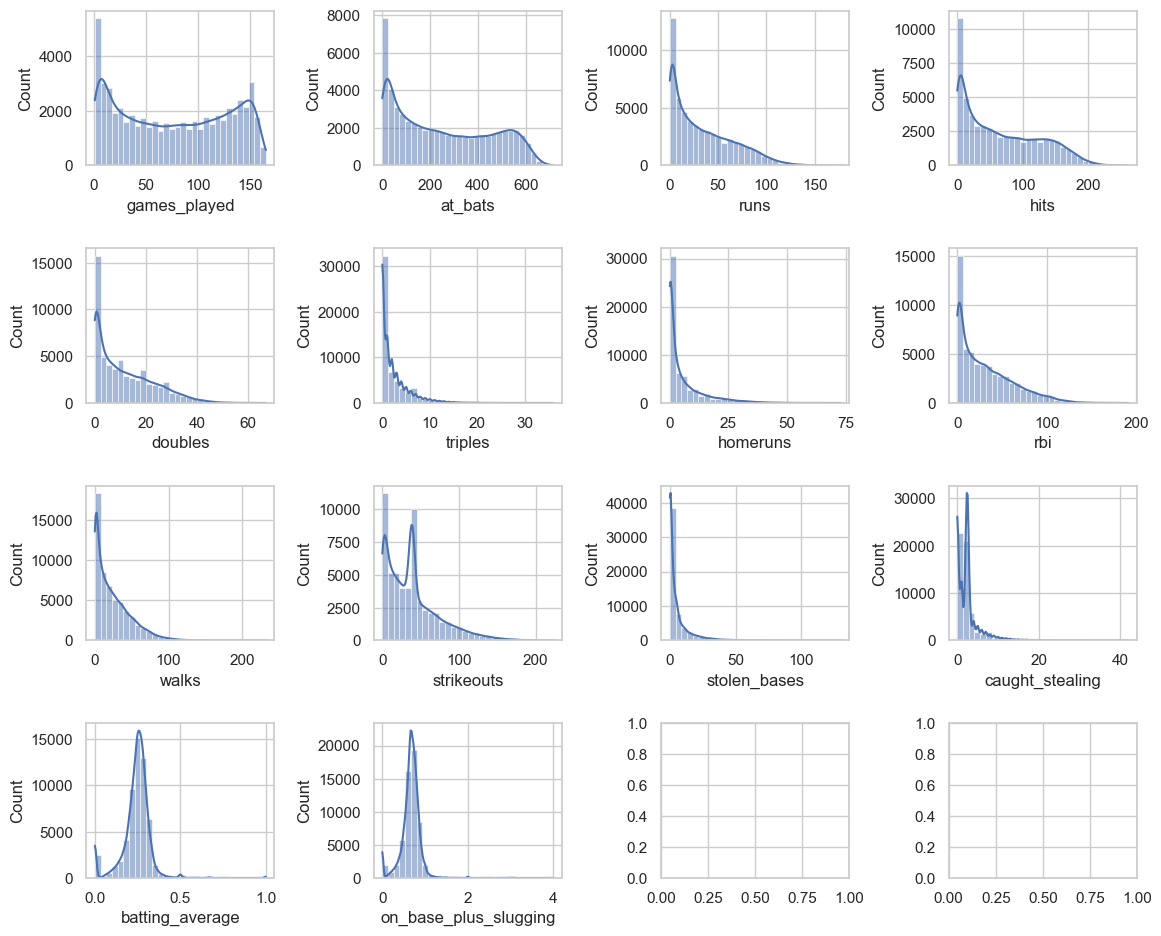

In [15]:
columns =[
    ['games_played', 'at_bats', 'runs', 'hits'], 
    ['doubles','triples', 'homeruns', 'rbi'], 
    ['walks', 'strikeouts', 'stolen_bases','caught_stealing'], 
    ['batting_average','on_base_plus_slugging']
]
sns.set(style="whitegrid")
fig, ax = plt.subplots(4, 4, figsize = (12, 10))
fig.tight_layout(pad=3.0) 

for i in range(len(columns)):
    for j in range(len(columns[i])):
        column = columns[i][j]
        sns.histplot(mlb_df[column], ax=ax[i, j],bins =30, kde = True)
plt.show()

## Bar Plot

In [16]:
mlb_df['position'].value_counts()

position
C     10989
2B     6918
LF     6697
3B     6607
SS     6575
1B     6131
RF     6109
CF     5696
DH     1236
PH      103
OF       35
PR       25
Name: count, dtype: int64

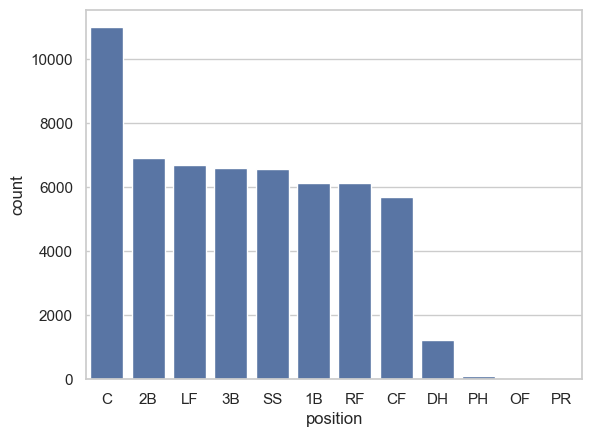

In [17]:
sns.barplot(mlb_df['position'].value_counts())
plt.show()

## 상관관계

In [18]:
from sklearn.preprocessing import LabelEncoder

def encode_feature(df):
    """
    범주형 데이터를 숫자로 인코딩
    """
    categories = ['position']
    for cate in categories:
        label_encoder = LabelEncoder()
        df[cate] = label_encoder.fit_transform(df[cate])
    return df
encode_feature(mlb_df)

,position,games_played,at_bats,runs,hits,doubles,triples,homeruns,rbi,walks,strikeouts,stolen_bases,caught_stealing,batting_average,on_base_plus_slugging
2,3,44,163,19,43,4,0,0,15.0,3,9.0,5.354748,2.448484,0.264,0.661401
4,2,66,309,63,110,9,7,2,59.0,12,8.0,5.354748,2.448484,0.356,0.661401
5,1,66,322,126,138,21,14,1,59.0,20,8.0,5.354748,2.448484,0.429,0.661401
6,2,64,283,34,85,11,4,0,46.0,6,6.0,5.354748,2.448484,0.300,0.661401
8,3,1,4,0,0,0,0,0,0.0,0,2.0,5.354748,2.448484,0.000,0.661401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103993,10,3,5,0,0,0,0,0,0.0,0,2.0,0.000000,0.000000,0.000,0.000000
104004,10,3,5,0,0,0,0,0,0.0,0,4.0,1.000000,0.000000,0.000,0.000000
104007,3,1,0,0,0,0,0,0,0.0,0,0.0,0.000000,0.000000,0.000,0.000000
104011,10,1,1,1,0,0,0,0,0.0,0,0.0,0.000000,0.000000,0.000,0.000000


In [19]:
corr_matrix = mlb_df.corr(numeric_only=True)
corr_matrix

,position,games_played,at_bats,runs,hits,doubles,triples,homeruns,rbi,walks,strikeouts,stolen_bases,caught_stealing,batting_average,on_base_plus_slugging
position,1.000000,0.024657,0.020519,0.027249,0.018500,0.009773,0.048892,-0.009201,-0.011368,-0.001720,0.021412,0.063714,0.071560,0.002957,-0.005126
games_played,0.024657,1.000000,0.970920,0.888619,0.940083,0.867963,0.568051,0.629029,0.853153,0.817783,0.700878,0.484429,0.460706,0.353473,0.410566
at_bats,0.020519,0.970920,1.000000,0.934840,0.982213,0.904513,0.618736,0.643302,0.887866,0.818238,0.695583,0.528485,0.490068,0.363674,0.412181
runs,0.027249,0.888619,0.934840,1.000000,0.954134,0.893302,0.650439,0.697658,0.898400,0.857396,0.651485,0.580295,0.488617,0.392541,0.471118
hits,0.018500,0.940083,0.982213,0.954134,1.000000,0.924918,0.651934,0.647330,0.907237,0.811437,0.641796,0.535601,0.496680,0.418831,0.459811
doubles,0.009773,0.867963,0.904513,0.893302,0.924918,1.000000,0.543450,0.674154,0.882689,0.769062,0.659318,0.428768,0.418504,0.386455,0.463904
triples,0.048892,0.568051,0.618736,0.650439,0.651934,0.543450,1.000000,0.208487,0.548108,0.469719,0.241662,0.536678,0.424867,0.299802,0.300240
homeruns,-0.009201,0.629029,0.643302,0.697658,0.647330,0.674154,0.208487,1.000000,0.819833,0.678321,0.745672,0.156458,0.184454,0.241899,0.440513
rbi,-0.011368,0.853153,0.887866,0.898400,0.907237,0.882689,0.548108,0.819833,1.000000,0.801586,0.680740,0.387523,0.352325,0.379375,0.491328
walks,-0.001720,0.817783,0.818238,0.857396,0.811437,0.769062,0.469719,0.678321,0.801586,1.000000,0.644819,0.433087,0.403038,0.306778,0.436818


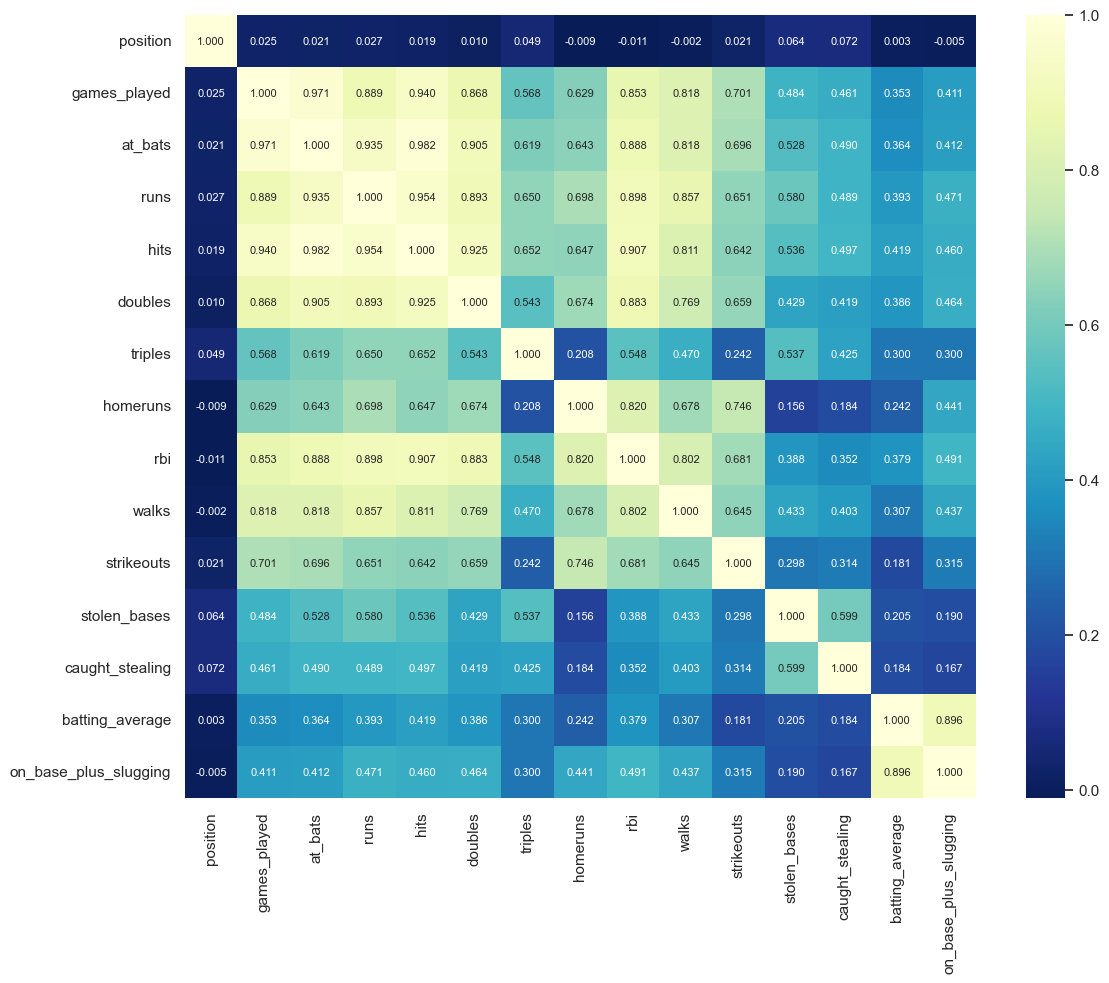

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='YlGnBu_r', annot_kws={"size": 8})
plt.tight_layout() 
plt.show()

## 산점도 + 회귀선

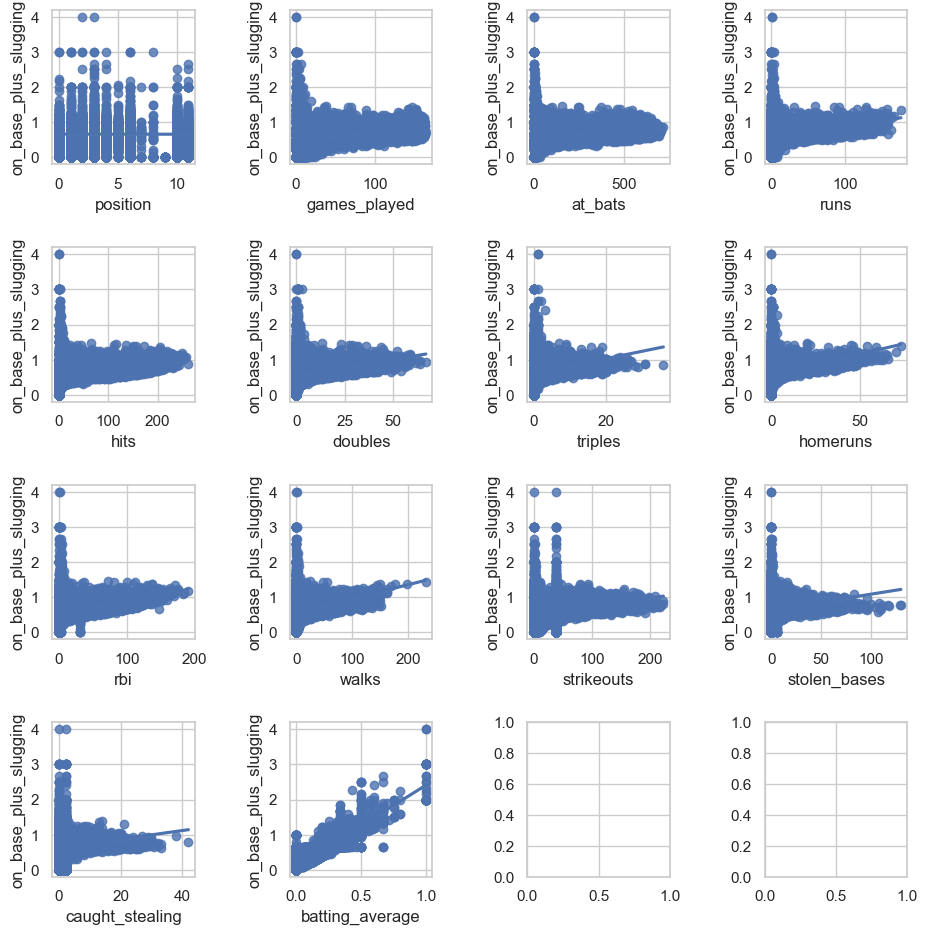

In [21]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 10), ncols=4, nrows=4)
fig.tight_layout(pad=3.0) 

columns = ['position','games_played', 'at_bats', 'runs', 'hits', 'doubles',
       'triples', 'homeruns', 'rbi', 'walks', 'strikeouts', 'stolen_bases',
       'caught_stealing', 'batting_average']

for i, col_name in enumerate(columns):
    #            i 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 
    row = i // 4 # 0 0 0 0 1 1 1 1 2 2 2  2  3  3  3  3
    col = i % 4  # 0 1 2 3 0 1 2 3 0 1 2  3  0  1  2  3
    ax_ = ax[row][col] 
    
    # sns.scatterplot(data=boston_df, x=col_name, y='MEDV', ax=ax_)
    # scatter + line plot(회귀선)
    sns.regplot(data=mlb_df, x=col_name, y='on_base_plus_slugging', ax=ax_)

## 학습/테스트 데이터 분리

In [22]:
# 데이터 준비
from sklearn.model_selection import train_test_split

X = mlb_df.drop('on_base_plus_slugging', axis = 1)
y = mlb_df['on_base_plus_slugging']
print(X.shape, y.shape)

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


(57121, 14) (57121,)


((42840, 14), (14281, 14), (42840,), (14281,))

## 스케일링

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-6.87523591e-01,  9.96980001e-03,  2.35061001e-01, ...,
         1.16150366e-03,  1.54841681e-03, -3.63907203e-02],
       [ 1.50984366e+00, -7.00114703e-01, -9.78580704e-01, ...,
        -5.84663192e-01,  1.54841681e-03,  9.34544422e-01],
       [-6.87523591e-01,  1.19984113e+00,  1.23216082e+00, ...,
         2.90559653e-01,  5.27973942e-01,  4.96439541e-01],
       ...,
       [-6.87523591e-01,  9.69543452e-01,  6.73180620e-01, ...,
        -4.75260336e-01,  5.27973942e-01, -9.55940826e-02],
       [-6.87523591e-01,  1.16145818e+00,  1.17173053e+00, ...,
         6.18768220e-01, -1.50620877e-01,  5.55642903e-01],
       [-6.87523591e-01, -4.12242607e-01, -5.20317654e-01, ...,
        -1.47051769e-01, -8.29215697e-01, -5.10017619e-01]])

## 교차검증

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression  

# 회귀 모델 생성 
lr = LinearRegression()
cv = 5

# 교차 검증 수행 (MSE로 평가)
scores_mse = cross_val_score(lr, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error',)
print("각 회차 MSE 점수:", -scores_mse)

# 교차 검증 수행 (MAE로 평가)
scores_mae = cross_val_score(lr, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')
print("각 회차 MAE 점수:", -scores_mae)

# 교차 검증 수행 (R²로 평가)
scores_r2 = cross_val_score(lr, X_train_scaled, y_train, cv=cv, scoring='r2')
print("각 회차 R² 점수:", scores_r2)

print(f'''
[최종점수]
MSE 점수 : {np.mean(-scores_mse)}
MAE 점수 : {np.mean(-scores_mae)}
RMSE 점수 : {np.sqrt(np.mean(-scores_mse))}
R² 점수 : {np.mean(scores_r2)}
''')

각 회차 MSE 점수: [0.00600451 0.00626268 0.00549584 0.00625246 0.00567821]
각 회차 MAE 점수: [0.04147853 0.04136002 0.0406107  0.04231828 0.0412005 ]
각 회차 R² 점수: [0.87599474 0.86938073 0.88389574 0.86719878 0.87404984]

[최종점수]
MSE 점수 : 0.005938740177637755
MAE 점수 : 0.04139360674323207
RMSE 점수 : 0.07706322195209434
R² 점수 : 0.8741039659044908



## Poly

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('lr', LinearRegression())
])

# 훈련
model.fit(X_train_scaled, y_train) # 다항변환후 학습
print(model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test))

y_pred = model.predict(X_test_scaled)

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'''
[최종점수]
MSE 점수 : {mse},
MAE 점수 : {mae},
RMSE 점수 : {rmse},
R² 점수 : {r2}
''')

evaluate_regression(y_test, y_pred)

0.9023578561653205 0.90749703026428

[최종점수]
MSE 점수 : 0.004231846207025526,
MAE 점수 : 0.03281649230271084,
RMSE 점수 : 0.06505264181434545,
R² 점수 : 0.90749703026428



In [32]:
# pipeline내 모델의 회귀계수/절편 
lr = model.named_steps['lr']
print(lr.coef_, lr.intercept_)

# 선형회귀식의 계산 - y = w1x1 + w2x2 + ... + b
coef = lr.coef_
intercept = lr.intercept_

poly = model.named_steps['poly']

# 예측값 확인 : 선형회귀식의 계산은 행렬곱을 통해 처리된다.
X_sample = poly.transform(X_test_scaled)[0] 
print(X_sample.shape, coef.shape)
y_sample = np.dot(X_sample, coef) + intercept
y_sample, model.predict(X_test_scaled)[0] # on_base_plus_slugging 예측값

[-2.86586782e-04 -1.16473954e-02 -2.49582078e-01  1.78507767e-03
  7.90849264e-02  5.61750715e-02  3.02964072e-02  1.19617246e-01
  1.57673167e-02  8.91303344e-02 -3.62079190e-03  3.59928464e-02
 -3.08624965e-03  8.92020618e-02 -8.43683221e-04  1.50015229e-03
 -1.12271937e-02  1.75600984e-03  1.02040050e-02 -1.49209245e-05
  7.79808323e-04 -1.11000006e-03 -5.21043945e-04  8.88174698e-06
  7.70938596e-04 -5.98081134e-04 -2.50520509e-04 -3.05656283e-03
 -8.39154390e-03 -3.25143171e-02 -1.18201544e-02  1.41135251e-01
 -3.92218614e-02 -2.40675122e-02 -4.59134374e-02 -1.73236376e-02
 -1.91017411e-02  1.17053795e-02 -2.04136561e-02  7.18184503e-03
  2.85747868e-02  1.12450006e-01  5.14891593e-02 -1.05451331e-01
  6.39339771e-02  4.58494318e-02  1.23981168e-05 -6.86126237e-02
 -1.36723060e-01 -1.13425966e-02 -1.05868013e-01 -1.47216076e-02
 -5.34753562e-02 -5.43662602e-04 -2.49872333e-02 -8.51547435e-03
 -9.19873221e-03 -3.20104127e-03  6.89432981e-04 -3.70000482e-03
  1.39969967e-03 -2.54079

(0.5055045094329166, 0.5055045094329167)